# Intro to Geospatial ML - India Version

1. Data types and operations

2. Coordinate reference systems

3. Geospatial data analysis

In [1]:
! pip install geopandas shapely leafmap


There is a natural progression from points to polygons to lines to networks. We will demonstrate these with a dataset of schools in India. 

UDISE, Unified District Information System for Education (UDISE), is a geolocated dataset of schools in India. The online portal is at https://schoolgis.nic.in/

In [3]:
# Let's set up some data

# ! mkdir -p data
# ! git clone https://github.com/datameet/udise_schools
# ! unzip udise_schools.zip -d data/udise_schools

In [2]:
# Points

# Raw data is present in geojson format in data/udise_schools/raw/*.geojson

import os
import glob

# Get list of all geojson files in the raw directory
geojson_files = glob.glob('data/udise_schools/raw/*.geojson')

# Let's pick one file and inspect
rand_school_file = geojson_files[0]

import geopandas as gpd

rand_school_data = gpd.read_file(rand_school_file)

rand_school_data


,school_typ,udise_stco,udise_dtco,objectid,sdtcode11,pincode,school_cat,dtname,management,schcat,...,schname,udise_vico,sdtname,vilname,longitude,dist_lgd,schcd,schmgt,lgd_dt_ud,geometry
0,Co. Educational,02,205,1410529,,175025,Primary,MANDI,Department of Education,1,...,GPS-CHASWAL,20519063,,CHASWAL,76.766111,22,2051906301,1,22,POINT (76.76611 31.76028)
1,Co. Educational,02,205,1410538,,175025,Primary,MANDI,Department of Education,1,...,GPS-GARLI,20519060,,GARLI,76.757222,22,2051906001,1,22,POINT (76.75722 31.76056)
2,Co. Educational,02,205,1410545,,175025,Primary,MANDI,Department of Education,1,...,GPS-GHARWASRA,20519059,,GHARWASRA,76.758611,22,2051905901,1,22,POINT (76.75861 31.76083)
3,Co. Educational,02,205,1410546,,175025,Upper Pri. Secondary and Higher Sec,MANDI,Department of Education,5,...,GSSS-GHARWASRA,20519059,,GHARWASRA,76.758611,22,2051905902,1,22,POINT (76.75861 31.76083)
4,Co. Educational,02,205,1410548,,175025,Primary,MANDI,Department of Education,1,...,GPS-JODHAN-I,20519012,,JODHAN,76.746667,22,2051901203,1,22,POINT (76.74667 31.76111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Co. Educational,02,205,1420407,,175012,Primary with Upper Primary,MANDI,Private Unaided (Recognized),2,...,EXCELLENCY PUBLIC SCHOOL KUFRI,20512098,,KUFRI,77.457778,21,2051209804,5,22,POINT (77.45778 32.42)
839,Co. Educational,02,205,1420810,,175017,Primary,MANDI,Department of Education,1,...,GPS KANDHI,20504015,,KANDHI,76.913889,21,2050401501,1,22,POINT (76.91389 32.45056)
840,Co. Educational,02,205,1421305,,175012,Pri. with Upper Pri. Sec. and H.Sec.,MANDI,Private Unaided (Recognized),3,...,ASCENT PUB SCHOOL PADHAR DALAH,20512014,,GAWALI,77.521667,21,2051201404,5,22,POINT (77.52167 32.48944)
841,Co. Educational,02,205,1421859,,175013,Primary,MANDI,Department of Education,1,...,GPS KHABAN,20512153,,LATRAN,77.477222,21,2051215303,1,22,POINT (77.47722 32.52944)


In [5]:
import leafmap.foliumap as leafmap

# Create a map centered on India
m = leafmap.Map(center=[20.5937, 78.9629], zoom=5)

# Add the school points as a cluster layer
m.add_gdf(
    rand_school_data,
    layer_name="Schools",
    marker_cluster=True
)

# Display the map
m

In [6]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=2)


# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add points from the GeoDataFrame to the marker cluster
for idx, row in rand_school_data.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],  # Assuming geometry is in POINT format
        popup=row['schname']  # Adjust the column name as needed
    ).add_to(marker_cluster)

# Display the map
m

Great! Now we have all the schools marked on the map. Let's try to plot a village wise distribution and see which villages have the maximum and minimum number of schools. But, what data type do we use to represent village boundaries?

In [7]:
# Let's now read a limited number of school data files and store it in the school_data dataframe
import geopandas as gpd
import pandas as pd

# Assuming geojson_files is a list of paths to GeoJSON files
school_data = gpd.GeoDataFrame()

# Limit to top k files (e.g., top 10)
top_k = 10
for file in geojson_files[:top_k]:
    gdf = gpd.read_file(file)
    school_data = pd.concat([school_data, gdf], ignore_index=True)

school_data.head()

,school_typ,udise_stco,udise_dtco,objectid,sdtcode11,pincode,school_cat,dtname,management,schcat,...,schname,udise_vico,sdtname,vilname,longitude,dist_lgd,schcd,schmgt,lgd_dt_ud,geometry
0,Co. Educational,02,205,1410529,,175025,Primary,MANDI,Department of Education,1,...,GPS-CHASWAL,20519063,,CHASWAL,76.766111,22,2051906301,1,22,POINT (76.76611 31.76028)
1,Co. Educational,02,205,1410538,,175025,Primary,MANDI,Department of Education,1,...,GPS-GARLI,20519060,,GARLI,76.757222,22,2051906001,1,22,POINT (76.75722 31.76056)
2,Co. Educational,02,205,1410545,,175025,Primary,MANDI,Department of Education,1,...,GPS-GHARWASRA,20519059,,GHARWASRA,76.758611,22,2051905901,1,22,POINT (76.75861 31.76083)
3,Co. Educational,02,205,1410546,,175025,Upper Pri. Secondary and Higher Sec,MANDI,Department of Education,5,...,GSSS-GHARWASRA,20519059,,GHARWASRA,76.758611,22,2051905902,1,22,POINT (76.75861 31.76083)
4,Co. Educational,02,205,1410548,,175025,Primary,MANDI,Department of Education,1,...,GPS-JODHAN-I,20519012,,JODHAN,76.746667,22,2051901203,1,22,POINT (76.74667 31.76111)


In [8]:
# Group by village and count the number of schools
village_school_counts = rand_school_data.groupby('vilname').size()

# Get the top 10 villages with the most schools
top_villages = village_school_counts.nlargest(10)

# Get the bottom 10 villages with non-zero schools
bottom_villages = village_school_counts[village_school_counts > 0].nsmallest(10)

# Display the results
print("Top Villages", top_villages)

print("Bottom Villages", bottom_villages)


Top Villages vilname
CHAUNTRA     8
BALH         7
LUDHIANA     7
BAROT        5
BHAROL       5
BIHANDHAR    5
DATWAR       5
DHARAMPUR    5
PANARSA      5
TIHARI       5
dtype: int64
Bottom Villages vilname
ALAG                   1
ANSWAI                 1
ARANG                  1
ARNEHAR                1
BADAGAWN               1
BADAN DHAR             1
BADEHAR                1
BADI JHUKAN            1
BAGG HALGARH SUHARA    1
BAILA                  1
dtype: int64


But village shapes might have changed. Let's check with the latest geospatial boundaries what the top/bottom villages are.

In [9]:
# ! git clone https://github.com/datameet/indian_village_boundaries data/indian_village_boundaries


In [10]:
# Let's parse all village boundaries in a villages geopandas dataframe. The files are in data/indian_village_boundaries/<state_name>/*.geojson
import glob

# Use glob to find the state name
village_boundaries_path = "data/indian_village_boundaries/*/*.geojson"

# Initialize an empty GeoDataFrame for village boundaries
village_boundaries = gpd.GeoDataFrame()

# Read all GeoJSON files in the specified directory
for file in glob.glob(village_boundaries_path):
    gdf = gpd.read_file(file)
    village_boundaries = pd.concat([village_boundaries, gdf], ignore_index=True)

village_boundaries.head()


,SUB_DIST,DISTRICT,STATE,TYPE,NAME,CEN_2001,geometry,LOC_CODE,TALUK,AREA,...,RIVER_IRR,LAKE_IRR,W_FALL,OTH_IRR,TOT_IRR,UN_IRR,AREA_NA_CU,SUB_DISTRICT,CENSUS_CODE_2001,SUB_DIST_CODE
0,Yangyang,South Sikkim,Sikkim,village,Satam,1103000231400,"POLYGON ((88.4042 27.28163, 88.40442 27.2816, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ravong,South Sikkim,Sikkim,village,Sangmo,1103000229600,"POLYGON ((88.40295 27.27438, 88.40291 27.27436...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Namchi,South Sikkim,Sikkim,village,Namphrik,1103000231500,"POLYGON ((88.39316 27.27005, 88.39337 27.26991...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Namchi,South Sikkim,Sikkim,village,Rong,1103000120600,"POLYGON ((88.38357 27.13132, 88.38338 27.13126...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Namchi,South Sikkim,Sikkim,village,Saleumbong,1103000121300,"POLYGON ((88.38706 27.16456, 88.38738 27.16458...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

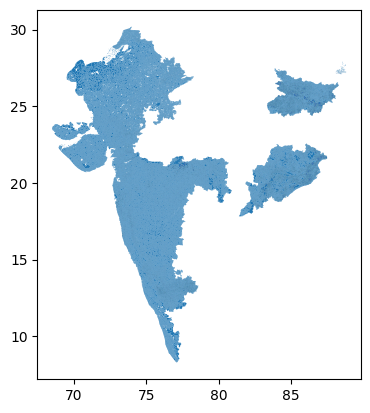

In [12]:
# Plot the village boundaries
village_boundaries.plot()


In [13]:
# Import necessary libraries
from shapely.geometry import Point

#rand_school_data = school_data

# Initialize a new column to check if schools are within village boundaries
rand_school_data['geometry'] = rand_school_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert both GeoDataFrames to the same CRS (Coordinate Reference System)
rand_school_data = gpd.GeoDataFrame(rand_school_data, geometry='geometry', crs="EPSG:4326")  # Assuming WGS84
village_boundaries = village_boundaries.to_crs(rand_school_data.crs)

# Spatial join to find which schools are within village boundaries
schools_within_villages = gpd.sjoin(rand_school_data, village_boundaries, how="inner", predicate='within')

# Count the number of schools in each village
village_school_counts = schools_within_villages['vilname'].value_counts()

# Get the top 10 villages with the most schools
top_villages = village_school_counts.nlargest(10)

# Get the bottom 10 villages with non-zero schools
bottom_villages = village_school_counts[village_school_counts > 0].nsmallest(10)

# Display the results
print("Top Villages:\n", top_villages)
print("\nBottom Villages:\n", bottom_villages)


Top Villages:
 Series([], Name: count, dtype: int64)

Bottom Villages:
 Series([], Name: count, dtype: int64)


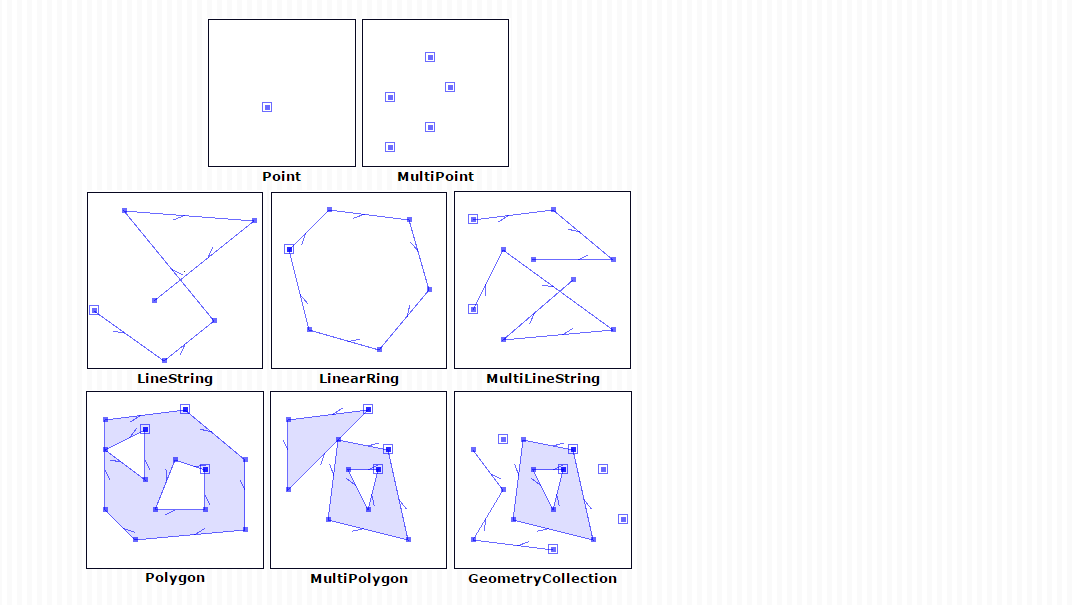


There are many different types of predicates applicable to different sets of data types in left, right geo dataframes


**Unary Predicates**

| Predicate           | Function                                                                 | Example                                                                                   |
|---------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| `has_z`             | Returns `True` if a geometry has a Z coordinate.                         | `Point(1, 2, 3).has_z` returns `True`.                                                    |
| `is_ccw`            | Returns `True` if a linestring or linearring is counterclockwise.        | `LinearRing([(0, 0), (1, 0), (1, 1), (0, 0)]).is_ccw` returns `False`.                    |
| `is_empty`          | Returns `True` if a geometry is empty.                                   | `Point().is_empty` returns `True`.                                                        |
| `is_ring`           | Returns `True` if a linestring is closed and simple.                     | `LineString([(0, 0), (1, 1), (0, 0)]).is_ring` returns `True`.                            |
| `is_simple`         | Returns `True` if a geometry has no self-intersections.                  | `LineString([(0, 0), (1, 1), (1, 0), (0, 1)]).is_simple` returns `False`.                 |
| `is_valid`          | Returns `True` if a geometry is well-formed.                             | `Polygon([(0, 0), (1, 1), (1, 0), (0, 0)]).is_valid` returns `False` due to self-intersection. |

**Binary Predicates**

| Predicate           | Function                                                                 | Example                                                                                   |
|---------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| `equals`            | Returns `True` if two geometries are spatially equal.                    | `Point(0, 0).equals(Point(0, 0))` returns `True`.                                         |
| `equals_exact`      | Returns `True` if two geometries are exactly equal, within a tolerance.   | `Point(0, 0).equals_exact(Point(0, 0.0001), tolerance=0.001)` returns `True`.             |
| `contains`          | Returns `True` if geometry A completely contains geometry B.             | `Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)]).contains(Point(1, 1))` returns `True`. |
| `covers`            | Returns `True` if no point in geometry B is outside geometry A.          | `Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)]).covers(LineString([(1, 1), (1, 2)]))` returns `True`. |
| `covered_by`        | Returns `True` if no point in geometry A is outside geometry B.          | `Point(1, 1).covered_by(Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)]))` returns `True`. |
| `crosses`           | Returns `True` if geometries cross each other.                           | `LineString([(0, 0), (2, 2)]).crosses(LineString([(0, 2), (2, 0)]))` returns `True`.       |
| `disjoint`          | Returns `True` if geometries do not share any space.                     | `Point(0, 0).disjoint(Point(1, 1))` returns `True`.                                       |
| `intersects`        | Returns `True` if geometries share any portion of space.                 | `Point(0, 0).intersects(LineString([(0, 0), (1, 1)]))` returns `True`.                    |
| `overlaps`          | Returns `True` if geometries overlap but neither completely contains the other. | `Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)]).overlaps(Polygon([(1, 1), (3, 1), (3, 3), (1, 3), (1, 1)]))` returns `True`. |
| `touches`           | Returns `True` if geometries have at least one boundary point in common but interiors do not intersect. | `Point(0, 0).touches(LineString([(0, 0), (1, 1)]))` returns `True`. |
| `within`            | Returns `True` if geometry A is completely inside geometry B.            | `Point(1, 1).within(Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)]))` returns `True`.    |


Now, let's look at some graphical data. May be check connectivity of our villages with national highways? 

OSM (Open Street Map) provides information on highways through the OSMnx API. Let's use that to check village intersections.

In [14]:
# ! pip install osmnx

In [15]:
import osmnx as ox

# Define the place of interest
place_name = "Goa"

# Retrieve the road network for the specified place
graph = ox.graph_from_place(place_name, network_type='all')

# Convert the graph to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(graph)

# Filter for national highways
national_highways = edges[edges['highway'].isin(['motorway', 'trunk'])]

# Display the first few records
print(national_highways.head())
print(len(national_highways))


                               osmid highway  oneway reversed       length  \
u          v          key                                                    
1336851032 4750215604 0    248675956   trunk   False     True   171.378613   
           4750215613 0    365713799   trunk   False     True   403.219298   
1336851086 4750215593 0    248675956   trunk   False    False   118.907366   
           7254727823 0    248675956   trunk   False     True    76.059964   
1340905001 7254727823 0    248675956   trunk   False    False  1409.274926   

                                                                    geometry  \
u          v          key                                                      
1336851032 4750215604 0    LINESTRING (74.05749 14.94825, 74.05847 14.94703)   
           4750215613 0    LINESTRING (74.05749 14.94825, 74.05513 14.95107)   
1336851086 4750215593 0    LINESTRING (74.06014 14.94022, 74.05997 14.94127)   
           7254727823 0    LINESTRING (74.06014 14.94

Do any of these villages intersect with highways?

<Axes: >

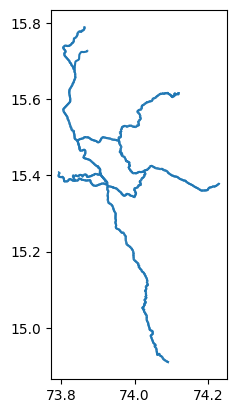

In [17]:
national_highways.plot()

In [16]:
# Ensure both GeoDataFrames have the same CRS
village_boundaries = village_boundaries.to_crs(national_highways.crs)

# Perform a spatial join to find intersections between villages and national highways
intersecting_villages = gpd.sjoin(village_boundaries, national_highways, how="inner", predicate="intersects")

# Display the intersecting villages
# print(intersecting_villages)

# Count the total unique number of villages with intersections of highways
unique_villages_count = intersecting_villages['NAME'].nunique()

# Display the result
print(f"Total unique villages with intersections of highways: {unique_villages_count}")


Total unique villages with intersections of highways: 89


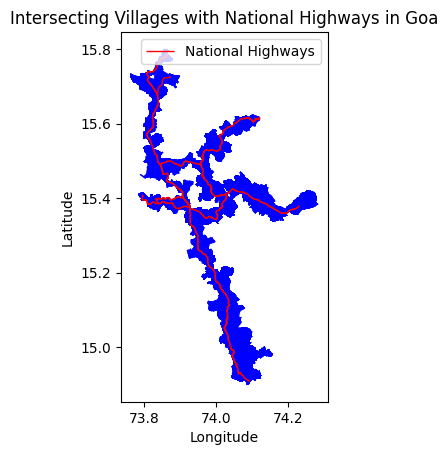

In [18]:
import matplotlib.pyplot as plt

# Plot the national highways
ax = national_highways.plot(color='red', linewidth=1, label='National Highways')

# Plot the intersecting villages
intersecting_villages.plot(ax=ax, color='blue', markersize=5, label='Intersecting Villages')

# Set title and labels
plt.title('Intersecting Villages with National Highways in Goa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()

